In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

In [4]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
train.select_dtypes(include=["object"]).describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Rice, Master. Eric",male,1601,G6,S
freq,1,577,7,4,644


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


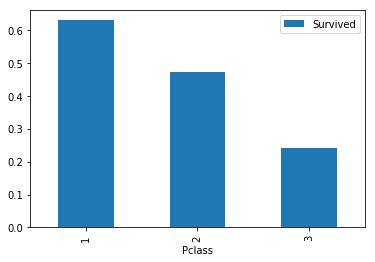

In [10]:
sex_pivot=train.pivot_table(index="Pclass",values="Survived")
sex_pivot.plot.bar()

In [11]:
age_mean=train["Age"].mean()
age_std=train["Age"].std()
age_null_count=train["Age"].isnull().sum()

In [12]:
age_mean1=test["Age"].mean()
age_std1=test["Age"].std()
age_null_count1=test["Age"].isnull().sum()

In [13]:
random_age_list1=np.random.randint(age_mean1-age_std1,age_mean1+age_std1,age_null_count1)

In [14]:
random_age_list=np.random.randint(age_mean-age_std,age_mean+age_std,age_null_count)

In [15]:
train["Age"][np.isnan(train["Age"])]=random_age_list

C:\Users\Rahul Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
test["Age"][np.isnan(test["Age"])]=random_age_list1

C:\Users\Rahul Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
dataset=[train,test]

In [18]:
for file in dataset:
    file.loc[file["Age"]<=16,"Age"]=0
    file.loc[(file["Age"]>16) & (file["Age"]<=32),"Age"]=1
    file.loc[(file["Age"]>32) & (file["Age"]<=48),"Age"]=2
    file.loc[(file["Age"]>48) & (file["Age"]<=64),"Age"]=3
    file.loc[file["Age"]>64,"Age"]=4
    file["Age"]=file["Age"].astype("int")

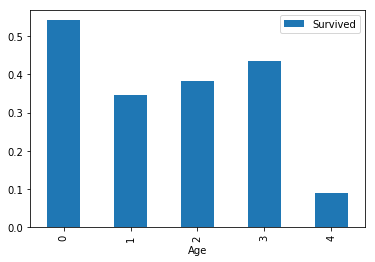

In [19]:
train[['Age', 'Survived']].groupby(['Age']).mean().plot.bar()

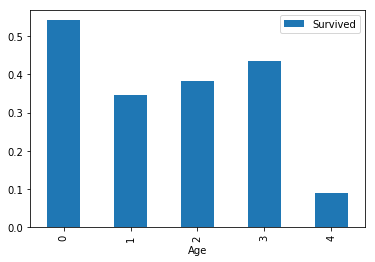

In [20]:
age_pivot=train.pivot_table(index="Age",values="Survived")
age_pivot.plot.bar()

    

In [21]:
train["Family_size"]=train["SibSp"]+train["Parch"]+1
test["Family_size"]=test["SibSp"]+test["Parch"]+1



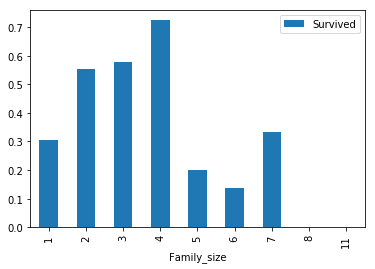

In [22]:
family_pivot=train.pivot_table(index="Family_size",values="Survived")
family_pivot.plot.bar()

In [23]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_size'],
      dtype='object')

In [24]:
train["Embarked"]=train["Embarked"].fillna("S")

In [25]:
test["Fare"]=test["Fare"].fillna(test.Fare.median())

In [26]:
import re as re

In [27]:
def title_search(name):
    get_title=re.search('([A-Za-z]+)\.',name)
    if get_title:
        return get_title.group(1)
    
    return " "
        

In [28]:
train["title"]=train["Name"].apply(title_search)
test["title"]=test["Name"].apply(title_search)

In [29]:
print(pd.crosstab(train["title"],train["Sex"]))

Sex       female  male
title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


In [30]:
train["title"]=train["title"].replace(["Capt","Col","Countess","Don","Dr","Jonkheer","Major","Rev","Sir","Lady"],"Rare")
test["title"]=test["title"].replace(["Capt","Col","Countess","Don","Dr","Jonkheer","Major","Rev","Sir","Lady","Dona"],"Rare")

In [31]:
train["title"]=train["title"].replace("Mlle","Miss")
train["title"]=train["title"].replace("Mme","Miss")
train["title"]=train["title"].replace("Ms","Mrs")
test["title"]=test["title"].replace("Mme","Miss")
test["title"]=test["title"].replace("Mlle","Miss")
test["title"]=test["title"].replace("Ms","Mrs")




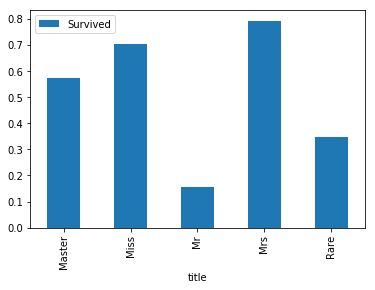

In [32]:
p=train.pivot_table(index="title",values="Survived")
p.plot.bar()

In [33]:
title_mapping={"Mr":3,"Master":1,"Miss":2,"Mrs":4,"Rare":5}

In [34]:
for file in dataset:
    file["title"]=file["title"].map(title_mapping)

In [35]:
y=train.Survived

In [36]:
train=train.drop(["Survived"],axis=1)

In [37]:
train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_size', 'title'],
      dtype='object')

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int32
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Family_size    891 non-null int64
title          891 non-null int64
dtypes: float64(1), int32(1), int64(6), object(5)
memory usage: 87.1+ KB


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Family_size    418 non-null int64
title          418 non-null int64
dtypes: float64(1), int32(1), int64(6), object(5)
memory usage: 40.9+ KB


In [40]:

for file in dataset:
    file.loc[file["Fare"]<7.91,"Fare"]=0
    file.loc[(file["Fare"]>=7.91) & (file["Fare"]<14.454) ,"Fare"]=1
    file.loc[(file["Fare"]>=14.454) & (file["Fare"]<31) ,"Fare"]=2
    file.loc[(file["Fare"]>=31),"Fare"]=3
    file['Fare'] = file['Fare'].astype(int)



In [41]:
col_of_interest=["Pclass","Sex","Embarked","Family_size","title","Fare","Age"]

In [42]:
train_X=train[col_of_interest]
test_X=test[col_of_interest]

In [43]:
train_X["Sex"]=train_X["Sex"].map({"male":1,"female":0})
test_X["Sex"]=test_X["Sex"].map({"male":1,"female":0})
train_X["Embarked"]=train_X["Embarked"].map({"S":0,"C":1,"Q":2})
test_X["Embarked"]=test_X["Embarked"].map({"S":0,"C":1,"Q":2})




C:\Users\Rahul Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Rahul Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Rahul Singh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [44]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass         418 non-null int64
Sex            418 non-null int64
Embarked       418 non-null int64
Family_size    418 non-null int64
title          418 non-null int64
Fare           418 non-null int32
Age            418 non-null int32
dtypes: int32(2), int64(5)
memory usage: 19.7 KB


In [45]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Pclass         891 non-null int64
Sex            891 non-null int64
Embarked       891 non-null int64
Family_size    891 non-null int64
title          891 non-null int64
Fare           891 non-null float64
Age            891 non-null int32
dtypes: float64(1), int32(1), int64(5)
memory usage: 45.3 KB


In [46]:
clf1=SVC()
clf2=LogisticRegression()
clf3=DecisionTreeClassifier()
clf4=RandomForestClassifier()
clf5=AdaBoostClassifier()
clf6=GradientBoostingClassifier()
clf7=XGBClassifier()
clf8=KNeighborsClassifier()

In [47]:
score1=cross_val_score(clf1,train_X,y,cv=10)
accuracy1=np.mean(score1)
score2=cross_val_score(clf2,train_X,y,cv=10)
accuracy2=np.mean(score2)
score3=cross_val_score(clf3,train_X,y,cv=10)
accuracy3=np.mean(score3)
score4=cross_val_score(clf4,train_X,y,cv=10)
accuracy4=np.mean(score4)
score5=cross_val_score(clf5,train_X,y,cv=10)
accuracy5=np.mean(score5)

score6=cross_val_score(clf6,train_X,y,cv=10)
accuracy6=np.mean(score6)
score7=cross_val_score(clf7,train_X,y,cv=10)
accuracy7=np.mean(score7)

score8=cross_val_score(clf8,train_X,y,cv=10)
accuracy8=np.mean(score8)


C:\Users\Rahul Singh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Rahul Singh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Rahul Singh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Rahul Singh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous

In [48]:
print(accuracy1)
print(accuracy2)
print(accuracy3)
print(accuracy4)
print(accuracy5)
print(accuracy6)
print(accuracy7)
print(accuracy8)


0.7834910906821019
0.7946266031097492
0.7891351719441606
0.7946524231074793
0.8160135058449667
0.8328674384292363
0.8272366927704008
0.7655757008285098
